# splitting then scaling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
%matplotlib inline

# Metrics for Classification technique
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

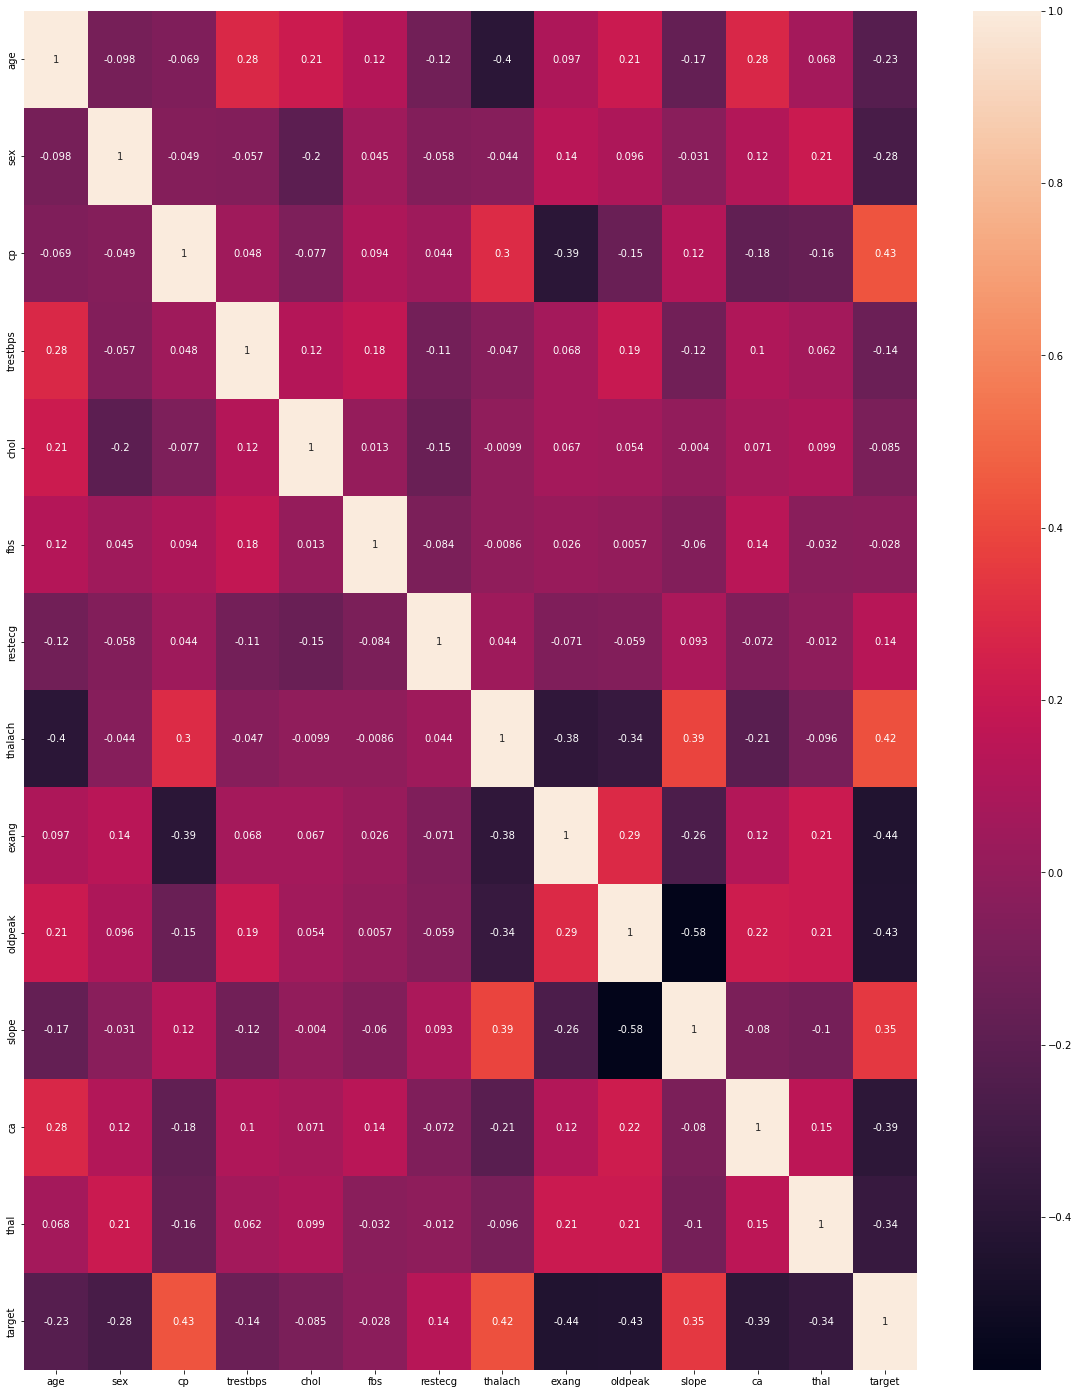

In [4]:
corr = df.corr()
plt.subplots(figsize=(20,25))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True, )

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [7]:
scaler = StandardScaler()
col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[col] = scaler.fit_transform(X_train[col])

In [8]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
37,-0.072269,1,2,1.126702,-0.299732,0,0,0.678479,0,0.515829,2,0,3
16,0.372295,0,2,-0.634945,1.668318,0,1,0.987987,0,-0.939786,2,0,2
126,-0.850256,1,0,-1.104718,-0.809967,0,1,-0.294262,0,-0.848811,2,0,2
291,0.372295,1,0,-0.987275,1.267419,0,2,-0.426908,0,3.063157,0,3,1
273,0.372295,1,0,-1.809377,-0.263286,0,1,0.280540,0,-0.848811,2,1,3


## Logistic Regression = 58%

In [9]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred = classifier.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.58


# Decision Tree = 77%

In [51]:
treemodel=DecisionTreeClassifier()

In [52]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5492021276595744, 0.95, 'X[11] <= 0.5\ngini = 0.499\nsamples = 203\nvalue = [96, 107]'),
 Text(0.3696808510638298, 0.85, 'X[12] <= 2.5\ngini = 0.387\nsamples = 122\nvalue = [32, 90]'),
 Text(0.2393617021276596, 0.75, 'X[9] <= 0.607\ngini = 0.191\nsamples = 84\nvalue = [9, 75]'),
 Text(0.1595744680851064, 0.65, 'X[3] <= 2.125\ngini = 0.101\nsamples = 75\nvalue = [4, 71]'),
 Text(0.10638297872340426, 0.55, 'X[0] <= 0.65\ngini = 0.079\nsamples = 73\nvalue = [3, 70]'),
 Text(0.06382978723404255, 0.45, 'X[3] <= -1.281\ngini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(0.0425531914893617, 0.35, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.02127659574468085, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06382978723404255, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0851063829787234, 0.35, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.14893617021276595, 0.45, 'X[9] <= -0.758\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text

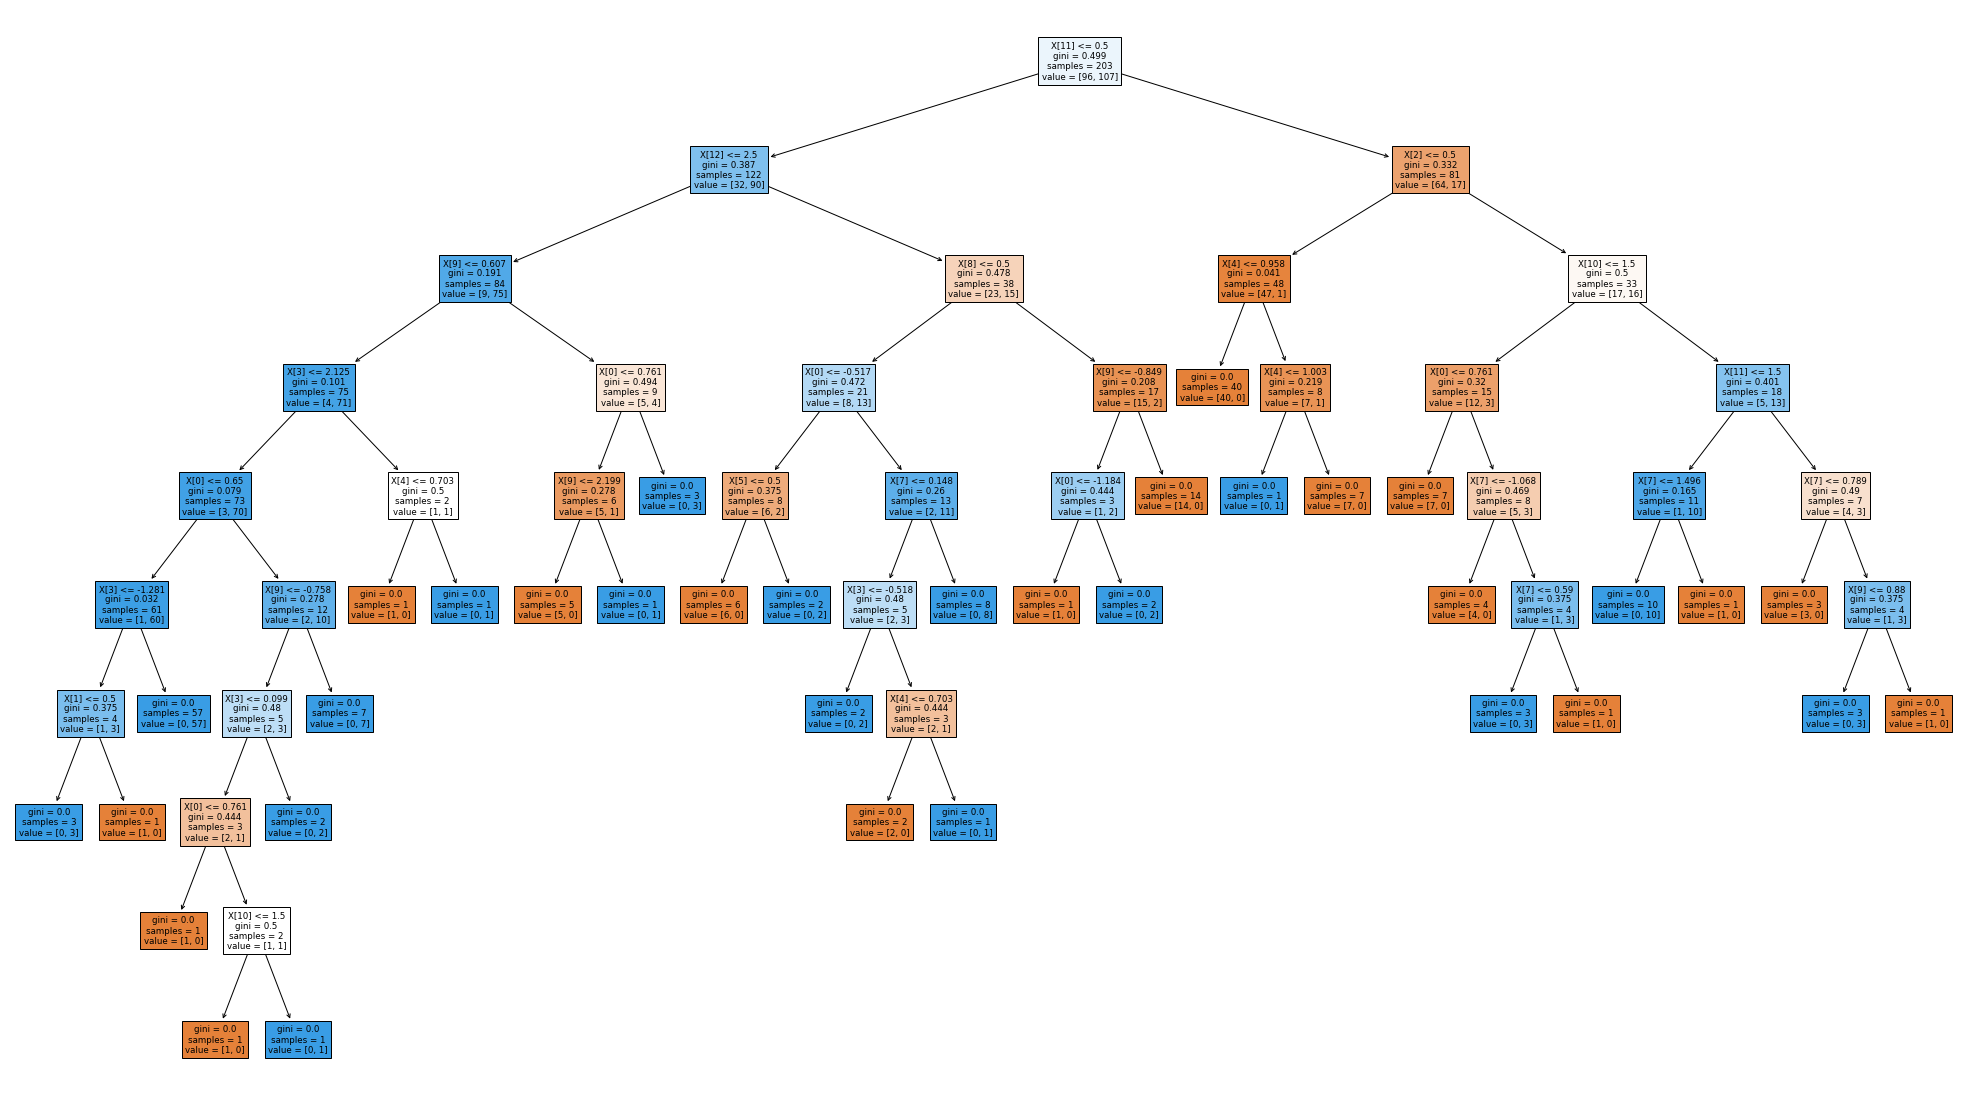

In [53]:
from sklearn import tree
plt.figure(figsize=(35,20))
tree.plot_tree(treemodel,filled=True)

In [54]:
y_pred=treemodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.76


In [55]:
treemodel=DecisionTreeClassifier(max_depth=3)

In [56]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[11] <= 0.5\ngini = 0.499\nsamples = 203\nvalue = [96, 107]'),
 Text(0.25, 0.625, 'X[12] <= 2.5\ngini = 0.387\nsamples = 122\nvalue = [32, 90]'),
 Text(0.125, 0.375, 'X[9] <= 0.607\ngini = 0.191\nsamples = 84\nvalue = [9, 75]'),
 Text(0.0625, 0.125, 'gini = 0.101\nsamples = 75\nvalue = [4, 71]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.375, 0.375, 'X[8] <= 0.5\ngini = 0.478\nsamples = 38\nvalue = [23, 15]'),
 Text(0.3125, 0.125, 'gini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(0.4375, 0.125, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.75, 0.625, 'X[2] <= 0.5\ngini = 0.332\nsamples = 81\nvalue = [64, 17]'),
 Text(0.625, 0.375, 'X[4] <= 0.958\ngini = 0.041\nsamples = 48\nvalue = [47, 1]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6875, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.875, 0.375, 'X[10] <= 1.5\ngini = 0.5\nsamples = 33\nvalue = [17, 16]'),
 Text(0.8125, 0.

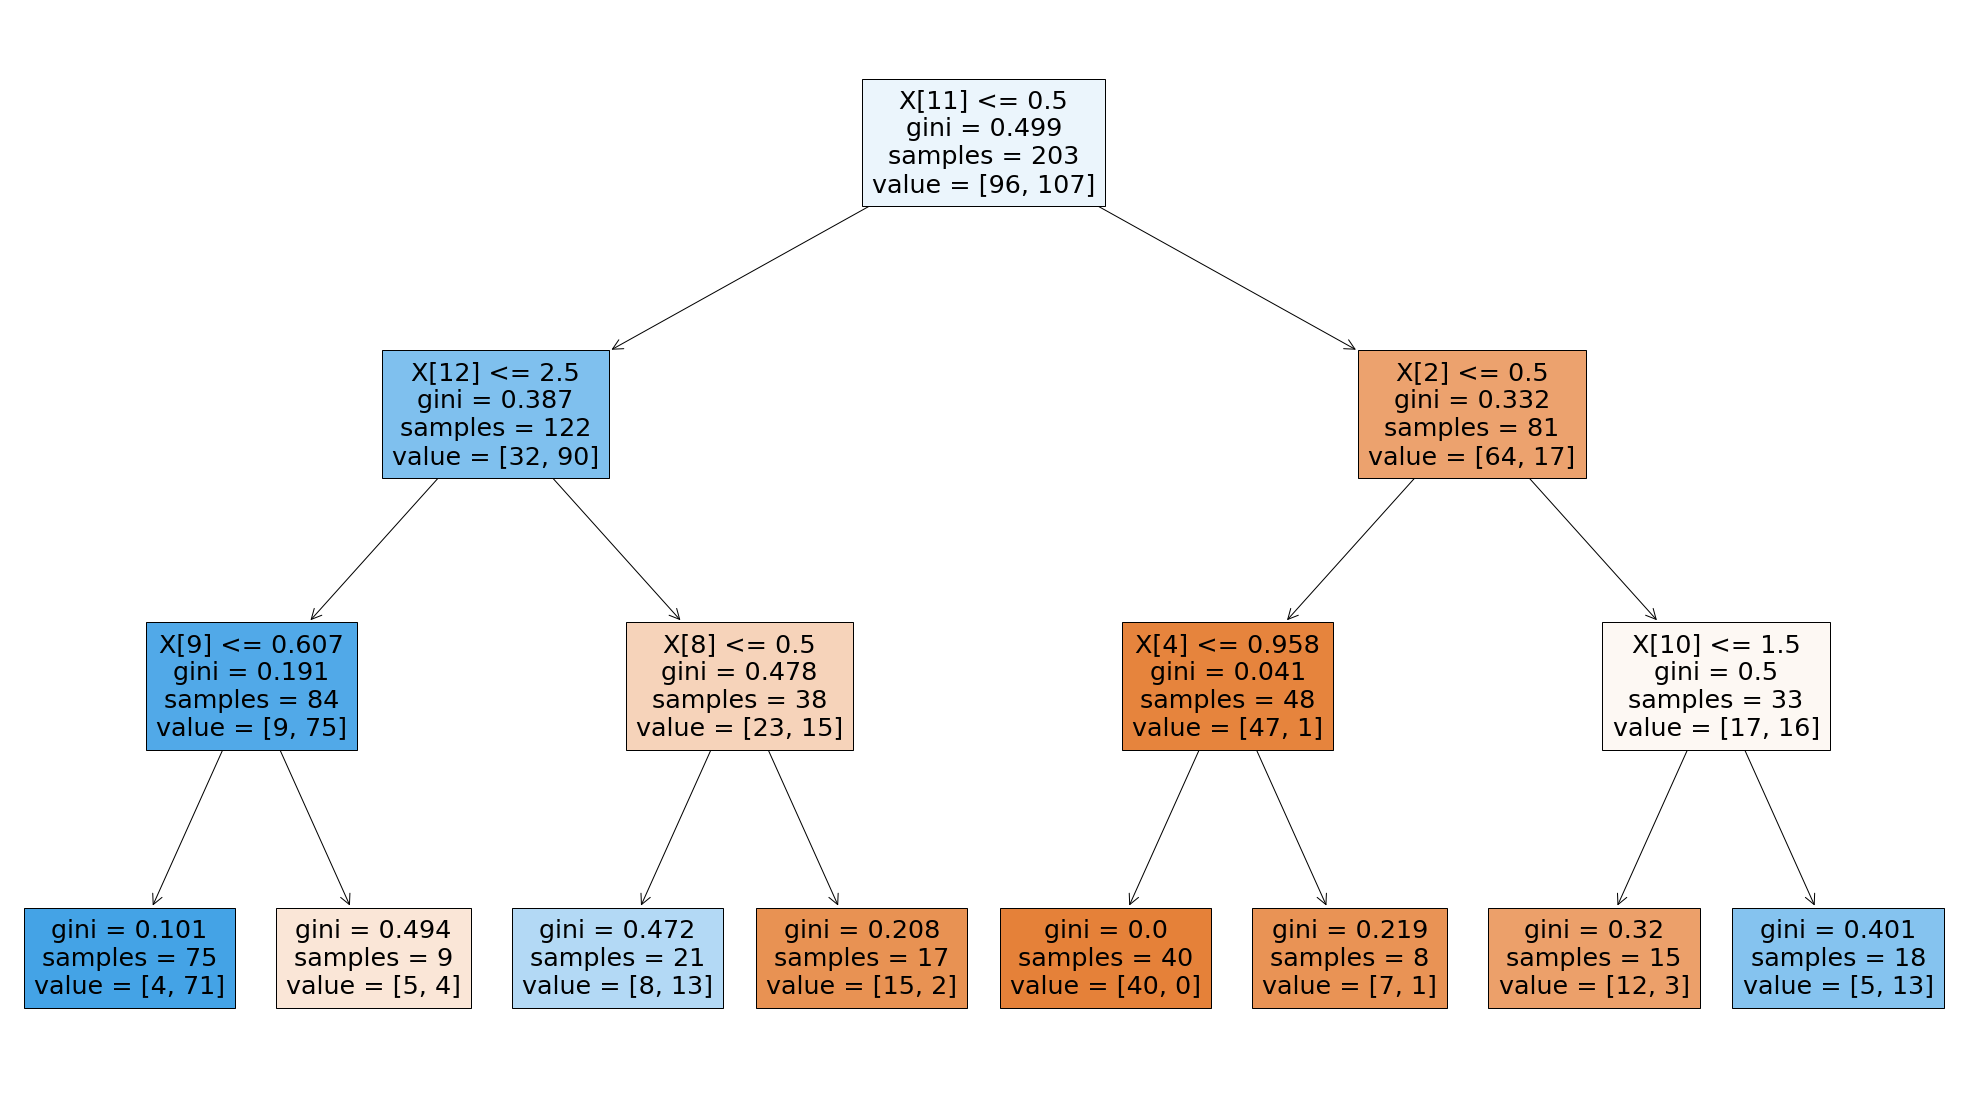

In [57]:
from sklearn import tree
plt.figure(figsize=(35,20))
tree.plot_tree(treemodel,filled=True)

In [58]:
y_pred=treemodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.73


In [73]:
## Preprunning
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [74]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=7,scoring='accuracy',refit='True')

In [75]:
cv.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             refit='True', scoring='accuracy')

In [76]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='sqrt', splitter='random')

In [77]:
cv=DecisionTreeClassifier(max_depth=4, max_features='sqrt', splitter='random')

In [79]:
cv.fit(X_train,y_train)
y_pred3=cv.predict(X_test)

In [80]:

score=accuracy_score(y_pred3,y_test)
print(score)

0.69


In [91]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=1200)

In [92]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score =accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.550


# KNN=73%

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.57


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

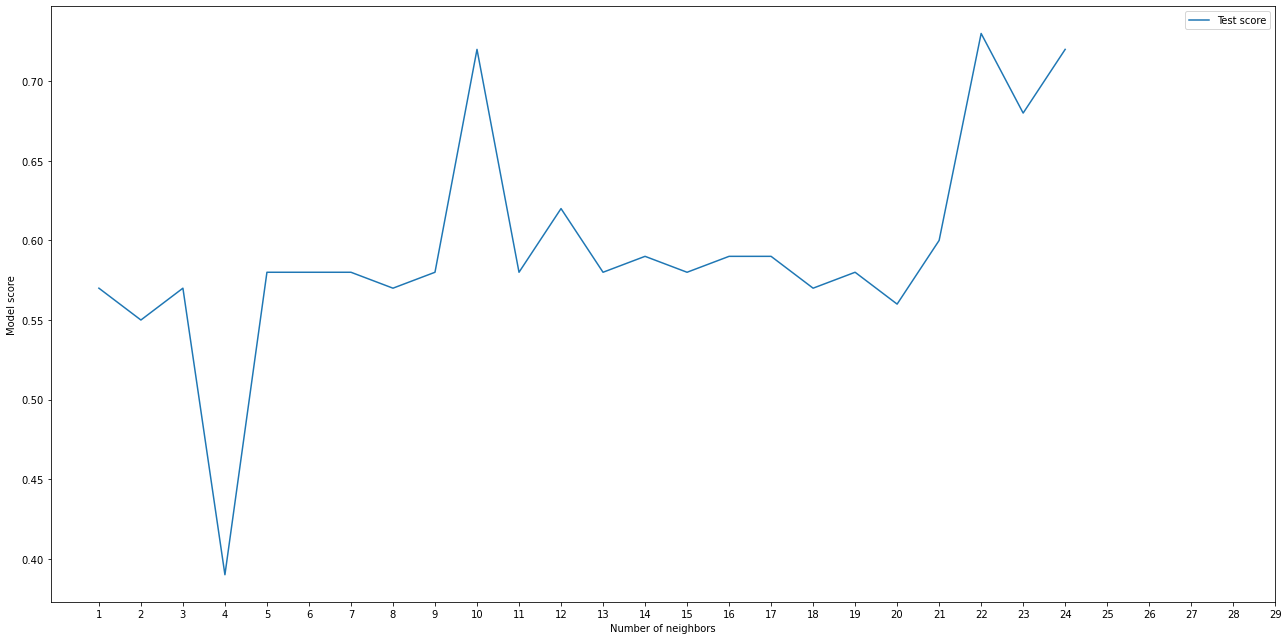

In [47]:
plt.figure(figsize=(18, 9))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

In [48]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=22')
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=22


0.73


              precision    recall  f1-score   support

           0       0.73      0.57      0.64        42
           1       0.73      0.84      0.78        58

    accuracy                           0.73       100
   macro avg       0.73      0.71      0.71       100
weighted avg       0.73      0.73      0.72       100



# Random Forest  85%

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

In [ ]:
## Hyperparameter Optimization

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

params2 ={
    
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth, 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, verbose=2, random_state, n_jobs=-1)

In [ ]:
rfcs.fit(X_train,y_train)

In [ ]:
rfcs.best_estimator_

In [ ]:
rfc=RandomForestClassifier(min_samples_leaf=2, n_estimators=1800, random_state=42)

In [ ]:
y_pred2 = rfcs.predict(X_test)
print(accuracy_score(y_test,y_pred2))

# XGB  84.7%


In [ ]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred3))

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
classifier=XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=7,
              missing=0, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [ ]:
score.mean()